In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [29]:
"""
first, we need to import all the data in ov_datasets.csv
which has gathered all tumor volume data in McCart 2021 et al. with webplotdigitizer

data structure:
1. the first 20 columns are the tumor volume under vvDD condition
   specifying x (time) and y (tumor volume) for each two columns, totalling 10 samples
   the first row can be ignored
   the 1-5 rows are the 5 time points for all 10 samples
2. the next 20 columns are the tumor volume under normal/PBS condition with similar structure
3. the last four columns are the mean and stde data of the tumor volume under vvDD condition and normal/PBS condition
   each two columns specify one condition, respectively the x and y
   each three rows specify one time point: mean, stde+, and stde-
   again, the first row can be ignored

"""

df = pd.read_csv('/Users/yuhongliu/Documents/OV/data/ov_datasets_v7.csv')

# Extract tumor volume data for vvDD condition
tumor_vol_vvDD = df.iloc[1:6, 1:20:2].values  # Select every other column starting from the second column (Y values)
# Create a DataFrame with known time points and extracted tumor volumes
tumor_vol_vvDD_df = pd.DataFrame(tumor_vol_vvDD, index=[0, 1, 2, 3, 4], columns=[f'vvDD_sample_{i+1}' for i in range(10)])

# Extract tumor volume data for normal/PBS condition
tumor_vol_pbs = df.iloc[1:6, 21:40:2].values  # Select every other column starting from the 21 column (Y values)
# Create a DataFrame with known time points and extracted tumor volumes
tumor_vol_pbs_df = pd.DataFrame(tumor_vol_pbs, index=[0, 1, 2, 3, 4], columns=[f'pbs_sample_{i+1}' for i in range(10)])

# Extract mean and standard deviation data for vvDD and PBS conditions, for comparison with the two dataframes above
vvDD_mean_stde_data = df.iloc[1:, -3].values
pbs_mean_stde_data = df.iloc[1:, -1].values
# Create DataFrames for vvDD and PBS data
vvDD_mean_stde_df = pd.DataFrame(vvDD_mean_stde_data.reshape(-1, 3), 
                                 index=[0, 1, 2, 3, 4], 
                                 columns=['mean', 'stde_plus', 'stde_minus'])

pbs_mean_stde_df = pd.DataFrame(pbs_mean_stde_data.reshape(-1, 3), 
                                index=[0, 1, 2, 3, 4], 
                                columns=['mean', 'stde_plus', 'stde_minus'])

# convert data to numeric type
tumor_vol_vvDD_df = tumor_vol_vvDD_df.apply(pd.to_numeric, errors='coerce')
tumor_vol_pbs_df = tumor_vol_pbs_df.apply(pd.to_numeric, errors='coerce')
vvDD_mean_stde_df = vvDD_mean_stde_df.apply(pd.to_numeric, errors='coerce')
pbs_mean_stde_df = pbs_mean_stde_df.apply(pd.to_numeric, errors='coerce')


In [30]:
tumor_vol_vvDD_df

,vvDD_sample_1,vvDD_sample_2,vvDD_sample_3,vvDD_sample_4,vvDD_sample_5,vvDD_sample_6,vvDD_sample_7,vvDD_sample_8,vvDD_sample_9,vvDD_sample_10
0,1.585933e+06,1.676076e+06,1.788754e+06,1.946504e+06,2.994412e+06,3.569072e+06,3.715553e+06,3.805696e+06,4.357820e+06,4.436695e+06
1,2.385949e+06,2.870466e+06,1.878897e+06,2.893002e+06,3.704286e+06,3.253572e+06,5.518406e+06,4.673319e+06,5.202907e+06,3.400054e+06
2,1.428184e+06,1.698612e+06,1.033810e+06,3.107090e+06,1.022542e+06,2.859198e+06,3.366251e+06,3.929642e+06,3.974714e+06,3.512732e+06
3,1.247898e+06,1.225363e+06,7.746494e+05,6.845068e+05,8.873277e+05,1.484523e+06,2.712716e+06,1.631005e+06,2.757788e+06,1.191559e+06
4,1.774543e+05,3.577396e+05,2.675970e+05,1.887222e+05,6.732389e+05,9.211312e+05,2.070450e+06,1.214095e+06,2.216932e+06,1.315505e+06


In [31]:
tumor_vol_pbs_df

,pbs_sample_1,pbs_sample_2,pbs_sample_3,pbs_sample_4,pbs_sample_5,pbs_sample_6,pbs_sample_7,pbs_sample_8,pbs_sample_9,pbs_sample_10
0,1.225623e+06,1.300774e+06,1.432177e+06,1.939172e+06,2.220837e+06,2.308506e+06,3.319348e+06,3.460160e+06,4.370894e+06,4.718280e+06
1,1.784693e+06,1.136825e+06,1.812839e+06,3.221181e+06,3.390159e+06,2.917007e+06,4.723391e+06,4.929965e+06,3.812696e+06,4.817258e+06
2,2.278001e+06,1.207656e+06,1.686445e+06,4.390503e+06,4.005542e+06,2.708451e+06,4.916297e+06,4.766056e+06,4.916277e+06,5.592251e+06
3,2.151627e+06,1.550824e+06,1.578930e+06,3.832285e+06,4.442558e+06,3.368053e+06,5.860248e+06,5.062199e+06,4.433128e+06,6.141953e+06
4,2.476078e+06,1.462128e+06,1.743812e+06,5.264575e+06,4.766968e+06,3.602197e+06,5.377282e+06,5.968736e+06,5.161278e+06,6.588398e+06


<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
/var/folders/2t/ydbb2dx16f3_f00v2ldb8_8m0000gn/T/ipykernel_13846/3137044352.py:15: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Tumor Volume ($\mu m^3$)')


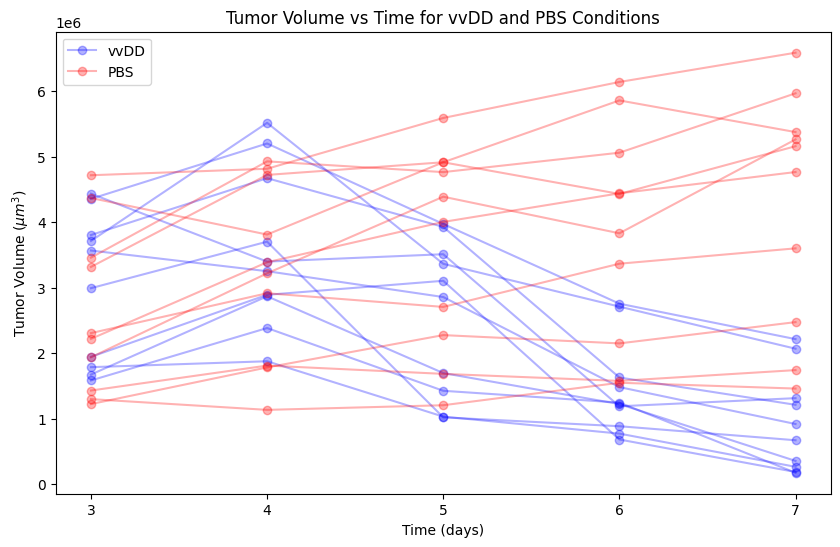

In [32]:
# plot the tumor volume data for vvDD and PBS condition
plt.figure(figsize=(10, 6))

# Plot vvDD data
for i in range(10):
    plt.plot(tumor_vol_vvDD_df.index, tumor_vol_vvDD_df.iloc[:, i], 
             marker='o', linestyle='-', color='blue', alpha=0.3, label='vvDD' if i == 0 else "")

# Plot PBS data
for i in range(10):
    plt.plot(tumor_vol_pbs_df.index, tumor_vol_pbs_df.iloc[:, i], 
             marker='o', linestyle='-', color='red', alpha=0.3, label='PBS' if i == 0 else "")

plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume ($\mu m^3$)')
plt.title('Tumor Volume vs Time for vvDD and PBS Conditions')
plt.legend()
plt.grid(False)
plt.xticks([0, 1, 2, 3, 4])
plt.gca().set_xticklabels([3, 4, 5, 6, 7])
plt.show()

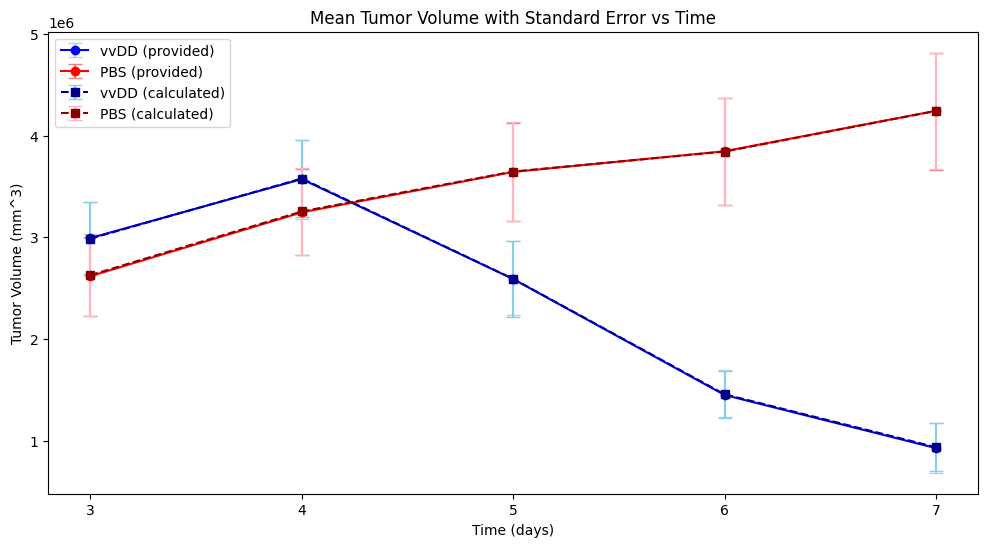

In [33]:
# plot the mean and stde data for vvDD and PBS condition

# Calculate mean and standard error for vvDD
vvDD_mean = tumor_vol_vvDD_df.mean(axis=1)
vvDD_se = tumor_vol_vvDD_df.sem(axis=1)
# Calculate mean and standard error for PBS
pbs_mean = tumor_vol_pbs_df.mean(axis=1)
pbs_se = tumor_vol_pbs_df.sem(axis=1)

# Plot both provided and calculated data
plt.figure(figsize=(12, 6))
# Plot provided data
plt.errorbar(vvDD_mean_stde_df.index, vvDD_mean_stde_df['mean'], 
             yerr=[vvDD_mean_stde_df['mean'] - vvDD_mean_stde_df['stde_minus'], 
                   vvDD_mean_stde_df['stde_plus'] - vvDD_mean_stde_df['mean']],
             fmt='o-', color='blue', ecolor='lightblue', capsize=5, label='vvDD (provided)')
plt.errorbar(pbs_mean_stde_df.index, pbs_mean_stde_df['mean'], 
             yerr=[pbs_mean_stde_df['mean'] - pbs_mean_stde_df['stde_minus'], 
                   pbs_mean_stde_df['stde_plus'] - pbs_mean_stde_df['mean']],
             fmt='o-', color='red', ecolor='lightcoral', capsize=5, label='PBS (provided)')
# Plot calculated data
plt.errorbar(vvDD_mean.index, vvDD_mean, yerr=vvDD_se,
             fmt='s--', color='darkblue', ecolor='skyblue', capsize=5, label='vvDD (calculated)')
plt.errorbar(pbs_mean.index, pbs_mean, yerr=pbs_se,
             fmt='s--', color='darkred', ecolor='lightpink', capsize=5, label='PBS (calculated)')
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm^3)')
plt.title('Mean Tumor Volume with Standard Error vs Time')
plt.legend()
plt.grid(False)
plt.xticks([0, 1, 2, 3, 4])
plt.gca().set_xticklabels([3, 4, 5, 6, 7])
plt.show()



In [34]:
# rescale the tumor volume to tumor cell number
scaled = True

if scaled:
    conversion_fac = 18 ** 3 # 7.5 um is the average diameter of an colon cancer cell
    tumor_vol_vvDD_df = tumor_vol_vvDD_df / conversion_fac
    tumor_vol_pbs_df = tumor_vol_pbs_df / conversion_fac

In [35]:
# make the measurement.tsv file
def create_rows(df, condition_prefix):
    rows = []
    for time in df.index:
        for i, col in enumerate(df.columns):
            condition = f"{condition_prefix}_{i+1}"
            rows.append({
                'observableId': 'tumor_num' if scaled else 'tumor_vol',
                'simulationConditionId': condition,
                'measurement': df.loc[time, col],
                'time': time,
                # 'observableParameters': 'scaling_1',
                # 'noiseParameters': 'sd_vol'
            })
    return rows

# Create rows for vvDD and PBS conditions
vvDD_rows = create_rows(tumor_vol_vvDD_df, 'vvDD')
pbs_rows = create_rows(tumor_vol_pbs_df, 'ctrl')

# Combine all rows
all_rows = vvDD_rows + pbs_rows

# Create the final dataframe
measurements_df = pd.DataFrame(all_rows)

# Reorder columns to match the specified order
column_order = ['observableId', 'simulationConditionId', 'measurement', 'time',
                #  'observableParameters',
                #    'noiseParameters'
                ]
measurements_df = measurements_df[column_order]

# Save to TSV file
if scaled:
    measurements_df.to_csv('petab_files/measurements_noscaling_newnoise_scaled.tsv', sep='\t', index=False)
else:
    measurements_df.to_csv('petab_files/measurements_noscaling_newnoise.tsv', sep='\t', index=False)

In [36]:
# Calculate the coefficient of variation for vvDD condition
vvDD_cv = tumor_vol_vvDD_df.std(axis=1) / tumor_vol_vvDD_df.mean(axis=1)

# Calculate the coefficient of variation for PBS condition
pbs_cv = tumor_vol_pbs_df.std(axis=1) / tumor_vol_pbs_df.mean(axis=1)

# Display the results
print("Coefficient of Variation for vvDD condition:")
print(vvDD_cv)

print("\nCoefficient of Variation for PBS condition:")
print(pbs_cv)

Coefficient of Variation for vvDD condition:
0    0.381965
1    0.336355
2    0.454973
3    0.503129
4    0.803177
dtype: float64

Coefficient of Variation for PBS condition:
0    0.482332
1    0.416977
2    0.423722
3    0.433913
4    0.426438
dtype: float64


In [37]:
tumor_vol_vvDD_df.std(axis=1)

0    195.675429
1    206.362587
2    202.309846
3    125.931833
4    129.495291
dtype: float64

In [38]:
tumor_vol_vvDD_df.mean(axis=1)

0    512.285920
1    613.526380
2    444.663476
3    250.297249
4    161.228829
dtype: float64

In [39]:
# 1. Create the model file using antimony
# this is being done in model_creation.py

# 2. Create the parameter table
parameter_df = pd.DataFrame({
    'parameterId': ['rho', 'kappa', 'psi_1', 'psi_2', 'zeta', 'alpha', 'delta'] +
        [f'theta_c_{i}' for i in range(1, 11)] + [f'theta_v_{i}' for i in range(1, 11)] + [ 'sigma_add', 'sigma_mul'],
    'parameterName': ['rho', 'kappa', 'psi_1', 'psi_2', 'zeta', 'alpha', 'delta'] + 
         [f'theta_c_{i}' for i in range(1, 11)] + [f'theta_v_{i}' for i in range(1, 11)] + ['additive_noise', 'multiplicative_noise'],
    'parameterScale': ['log10'] * 29,
    'lowerBound': [0.42, 1e2, 1e-10, 1e-10, 1e0, 1e-4, 1e-2] + 
                     [0.0000001] * 20 + [1e1, 1e-4],
    'upperBound': [1.66, 1e5, 1e-2, 1e-2, 1e4, 1e3, 1e2] + 
                     [1.0] * 20 + [1e5, 1e2],
    'nominalValue': [1] * 29,
    'estimate': [1] * 29,
    'parameterType': [''] * 29
})
# export the parameter table to tsv file
parameter_df.to_csv('petab_files/parameters_no_scaling_new_noise_formula.tsv', sep='\t', index=False)

# 3. Create the observable table
observable_df = pd.DataFrame({
    'observableId': ['tumor_vol' if not scaled else 'tumor_num'],
    'observableName': ['tumor_volume' if not scaled else 'tumor_number'],
    'observableFormula': ['C_u + C_i'],
    'noiseFormula': ['sqrt(sigma_add^2 + (sigma_mul * (C_u + C_i))^2)'],
    'noiseDistribution': ['normal'],
    'observableTransformation': ['lin']
})
# export the observable table to tsv file
observable_df.to_csv('petab_files/observables_no_scaling_new_noise_formula_scaled.tsv', sep='\t', index=False)

# 4. Create the measurement table
# this is being done above

# 5. Create the condition table
condition_ids = [f'vvDD_{i}' for i in range(1, 11)] + [f'ctrl_{i}' for i in range(1, 11)]
condition_names = condition_ids
virus_injection = [1e9] * 10 + [0] * 10
ini_theta = [f'theta_v_{i}' for i in range(1, 11)] + [f'theta_c_{i}' for i in range(1, 11)]

condition_df = pd.DataFrame({
    'conditionId': condition_ids,
    'conditionName': condition_names,
    'virus_injection': virus_injection,
    'ini_theta': ini_theta
})
# export the condition table to tsv file
condition_df.to_csv('petab_files/conditions.tsv', sep='\t', index=False)
